# Cat Boost for default prediction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gaarutyunov/credit-risk/blob/master/notebooks/colab_cat_boost.ipynb)

## Environment settings

For better performance change Colab runtime type to GPU

In [1]:
!git clone https://github.com/gaarutyunov/credit-risk.git

Cloning into 'credit-risk'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 151 (delta 75), reused 122 (delta 46), pack-reused 0
Receiving objects: 100% (151/151), 718.34 KiB | 22.45 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
%cd credit-risk

/content/credit-risk


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sberbank-ai/wing.git (to revision master) to /tmp/pip-install-9alfp8je/wing_c3df516b633e44f097ed3fd3c1df879a
  Running command git clone -q https://github.com/sberbank-ai/wing.git /tmp/pip-install-9alfp8je/wing_c3df516b633e44f097ed3fd3c1df879a
     |████████████████████████████████| 151 kB 28.1 MB/s 
     |████████████████████████████████| 79 kB 9.7 MB/s 
     |████████████████████████████████| 76.6 MB 1.8 MB/s 
     |████████████████████████████████| 155 kB 55.4 MB/s 
     |████████████████████████████████| 117 kB 56.0 MB/s 
     |████████████████████████████████| 596 kB 38.5 MB/s 
  Created wheel for wing: filename=wing-0.1.6-py3-none-any.whl size=12768 sha256=0cadc3fb3724310978ec3688da6f2b6ca37141e7a2f2abc7cd4a928d17f2c053
  Stored in directory: /tmp/pip-ephem-wheel-cache-vroomznh/wheels/d0/d3/78/d1cb5717341968f8319fa57765f68a894fc1b21d4f4068b519
  Created 

To get username and key follow instructions in [readme](https://github.com/Kaggle/kaggle-api)

In [4]:
%env KAGGLE_USERNAME=<username>
%env KAGGLE_KEY=<password>

env: KAGGLE_USERNAME=germanarutyunov
env: KAGGLE_KEY=e021f05bc06369f435b2dea53dda6ffb


In [5]:
!kaggle datasets download wordsforthewise/lending-club

100% 1.26G/1.26G [00:10<00:00, 127MB/s]
100% 1.26G/1.26G [00:10<00:00, 135MB/s]


In [6]:
!unzip lending-club.zip

Archive:  lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [7]:
!mkdir data

In [8]:
!mv accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv data/accepted_2007_to_2018Q4.csv
!mv rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv data/rejected_2007_to_2018Q4.csv

## Preprocessing

In [9]:
from pipeline import get_pipeline

preprocessing = get_pipeline(
    name="cat_boost",
    group='preprocessing',
    debug=True,
)

_target_: pipeline.make_preprocessing_pipeline
steps_config:
- CSVReader:
    _target_: pipeline.CSVReader
    _convert_: all
    file: data/accepted_2007_to_2018Q4.csv
    columns:
    - loan_amnt
    - term
    - int_rate
    - emp_title
    - emp_length
    - home_ownership
    - annual_inc
    - verification_status
    - loan_status
    - purpose
    - addr_state
    - dti
    - earliest_cr_line
    - fico_range_high
    - inq_last_6mths
    - revol_bal
    - initial_list_status
    - out_prncp
    - total_rec_late_fee
    - collection_recovery_fee
    - last_fico_range_low
    - collections_12_mths_ex_med
    - application_type
    - tot_coll_amt
    - avg_cur_bal
    - bc_open_to_buy
    - chargeoff_within_12_mths
    - delinq_amnt
    - mo_sin_old_il_acct
    - mo_sin_old_rev_tl_op
    - mo_sin_rcnt_tl
    - mort_acc
    - mths_since_recent_bc
    - num_accts_ever_120_pd
    - num_actv_bc_tl
    - num_bc_tl
    - num_il_tl
    - num_sats
    - num_tl_120dpd_2m
    - num_tl_30dpd

In [10]:
X = preprocessing.fit_transform([], y=[])
y = preprocessing.label_transformer.label

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:355: UserWarning: Persisting input arguments took 46.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name],


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True
)

## Training

To train with CPU remove overrides

In [12]:
from pipeline import get_pipeline

classifier = get_pipeline(
    name="cat_boost",
    group='classifier',
    overrides=["+classifier_pipeline.steps_config.0.Classifier.task_type=GPU"],
    debug=True,
)

_target_: pipeline.make_preprocessing_pipeline
steps_config:
- CSVReader:
    _target_: pipeline.CSVReader
    _convert_: all
    file: data/accepted_2007_to_2018Q4.csv
    columns:
    - loan_amnt
    - term
    - int_rate
    - emp_title
    - emp_length
    - home_ownership
    - annual_inc
    - verification_status
    - loan_status
    - purpose
    - addr_state
    - dti
    - earliest_cr_line
    - fico_range_high
    - inq_last_6mths
    - revol_bal
    - initial_list_status
    - out_prncp
    - total_rec_late_fee
    - collection_recovery_fee
    - last_fico_range_low
    - collections_12_mths_ex_med
    - application_type
    - tot_coll_amt
    - avg_cur_bal
    - bc_open_to_buy
    - chargeoff_within_12_mths
    - delinq_amnt
    - mo_sin_old_il_acct
    - mo_sin_old_rev_tl_op
    - mo_sin_rcnt_tl
    - mort_acc
    - mths_since_recent_bc
    - num_accts_ever_120_pd
    - num_actv_bc_tl
    - num_bc_tl
    - num_il_tl
    - num_sats
    - num_tl_120dpd_2m
    - num_tl_30dpd

In [13]:
classifier.fit(X_train, y_train)

0:	learn: 0.6909735	total: 131ms	remaining: 2m 10s
1:	learn: 0.6888111	total: 256ms	remaining: 2m 7s
2:	learn: 0.6866570	total: 372ms	remaining: 2m 3s
3:	learn: 0.6844805	total: 481ms	remaining: 1m 59s
4:	learn: 0.6823516	total: 595ms	remaining: 1m 58s
5:	learn: 0.6801989	total: 704ms	remaining: 1m 56s
6:	learn: 0.6780484	total: 814ms	remaining: 1m 55s
7:	learn: 0.6759340	total: 923ms	remaining: 1m 54s
8:	learn: 0.6738147	total: 1.03s	remaining: 1m 53s
9:	learn: 0.6717225	total: 1.14s	remaining: 1m 53s
10:	learn: 0.6696055	total: 1.25s	remaining: 1m 52s
11:	learn: 0.6675140	total: 1.36s	remaining: 1m 51s
12:	learn: 0.6654194	total: 1.48s	remaining: 1m 52s
13:	learn: 0.6633809	total: 1.59s	remaining: 1m 52s
14:	learn: 0.6615012	total: 1.7s	remaining: 1m 51s
15:	learn: 0.6594798	total: 1.81s	remaining: 1m 51s
16:	learn: 0.6574127	total: 1.92s	remaining: 1m 51s
17:	learn: 0.6553763	total: 2.04s	remaining: 1m 51s
18:	learn: 0.6533343	total: 2.15s	remaining: 1m 50s
19:	learn: 0.6512971	tota

Pipeline(memory='./.cache/classifier',
         steps=[('Classifier',
                 <catboost.core.CatBoostClassifier object at 0x7f4bfad64cd0>)])

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.949145036898171

In [16]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.8957244043134043

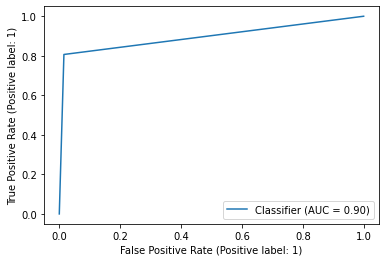

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

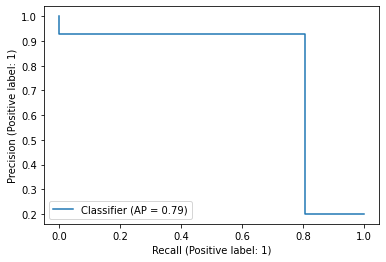

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_pred)

In [19]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred)

0.7889079904963417

In [20]:
classifier.steps[0][1].save_model("models/cat_boost")